In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [3]:
data = pd.read_csv('moore.csv', header=None).values
data[0:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [4]:
# make it a 2-D array of size N x D where D = 1
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

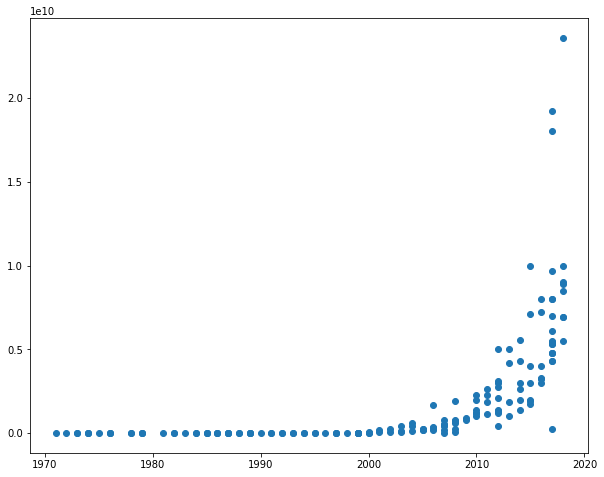

In [5]:
# Plot the data - it is exponential!
plt.figure(figsize=(10,8))
plt.scatter(X,Y)

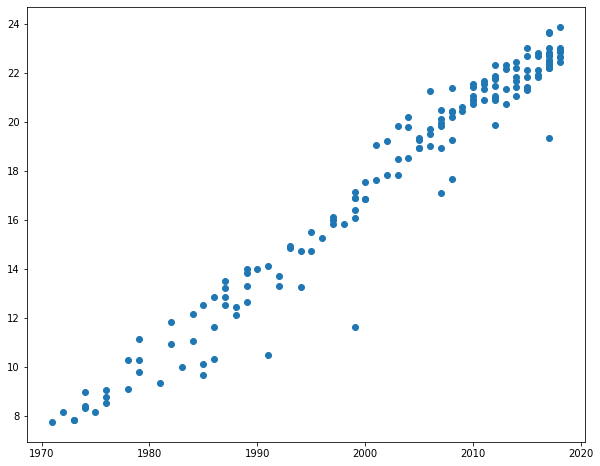

In [6]:
# since we want a linear model, let's take the log
Y = np.log(Y)
plt.figure(figsize=(10,8))
plt.scatter(X,Y)

In [7]:
# scale and center both x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

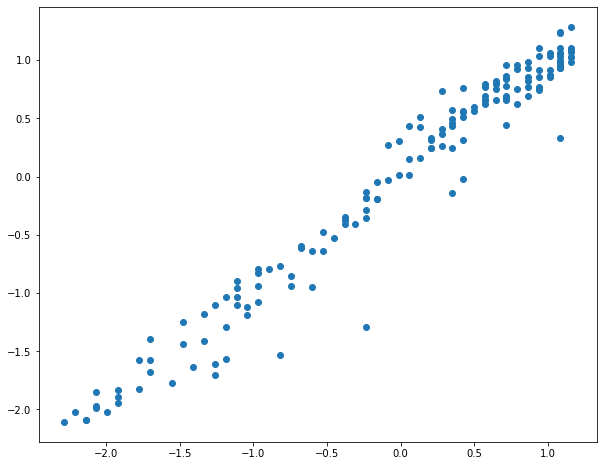

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X,Y)

In [9]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [10]:
# create the linear regression model
model = nn.Linear(1,1)

In [11]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [12]:
# pytorch uses float32 by default
# numpy uses float64 by default
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [13]:
type(inputs)

torch.Tensor

In [14]:
# train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # forward paa
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  
  # keep the loss so that we can plot it later
  losses.append(loss.item())

  # backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{n_epochs}, loss: {loss.item():.4f}")

Epoch 1/100, loss: 0.8536
Epoch 2/100, loss: 0.8213
Epoch 3/100, loss: 0.7686
Epoch 4/100, loss: 0.7045
Epoch 5/100, loss: 0.6360
Epoch 6/100, loss: 0.5675
Epoch 7/100, loss: 0.5020
Epoch 8/100, loss: 0.4412
Epoch 9/100, loss: 0.3861
Epoch 10/100, loss: 0.3369
Epoch 11/100, loss: 0.2936
Epoch 12/100, loss: 0.2557
Epoch 13/100, loss: 0.2230
Epoch 14/100, loss: 0.1947
Epoch 15/100, loss: 0.1706
Epoch 16/100, loss: 0.1500
Epoch 17/100, loss: 0.1324
Epoch 18/100, loss: 0.1176
Epoch 19/100, loss: 0.1050
Epoch 20/100, loss: 0.0944
Epoch 21/100, loss: 0.0854
Epoch 22/100, loss: 0.0779
Epoch 23/100, loss: 0.0715
Epoch 24/100, loss: 0.0662
Epoch 25/100, loss: 0.0617
Epoch 26/100, loss: 0.0579
Epoch 27/100, loss: 0.0548
Epoch 28/100, loss: 0.0521
Epoch 29/100, loss: 0.0499
Epoch 30/100, loss: 0.0481
Epoch 31/100, loss: 0.0465
Epoch 32/100, loss: 0.0452
Epoch 33/100, loss: 0.0441
Epoch 34/100, loss: 0.0432
Epoch 35/100, loss: 0.0424
Epoch 36/100, loss: 0.0418
Epoch 37/100, loss: 0.0412
Epoch 38/1

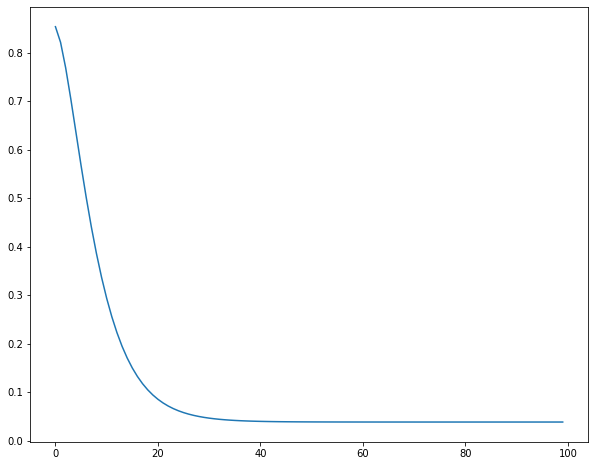

In [15]:
plt.figure(figsize=(10,8))
plt.plot(losses)

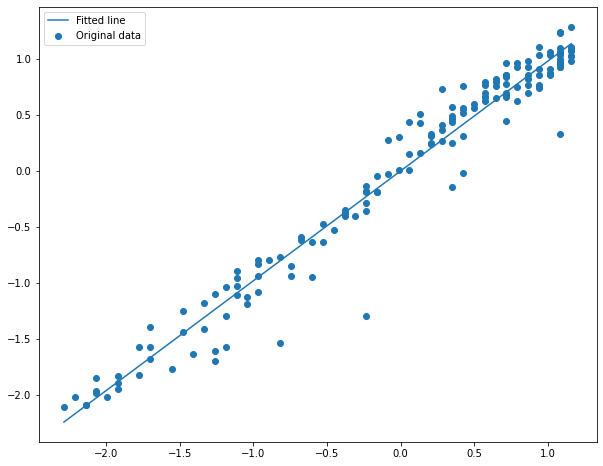

In [20]:
# plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.figure(figsize=(10,8))
plt.scatter(X,Y,label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [22]:
w = model.weight.data.numpy()
print(w)

[[0.980401]]


In [24]:
a = w[0,0] * sy/sx
print(a)

0.34162320043268424


In [25]:
np.log(2)/a

2.0289815787746175